## Tokenizers

In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
sentences = pd.read_json('~/Downloads/archive/Sarcasm_Headlines_Dataset_v2.json', lines = True)

In [25]:
sentences.columns

Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')

In [35]:
sentences = sentences[['headline', 'is_sarcastic']]

In [39]:
train, val, test = np.split(sentences.sample(frac = 1), 
                            [int(0.8 * len(sentences)), int(0.9 * len(sentences))])

In [40]:
tokenizer = Tokenizer(oov_token = "OOV")
tokenizer.fit_on_texts(train.headline)
word_index = tokenizer.word_index

In [41]:
train_sequences = tokenizer.texts_to_sequences(train.headline)
train_padded = pad_sequences(train_sequences,
                            padding = 'post')


In [42]:
val_sequences = tokenizer.texts_to_sequences(val.headline)
val_padded = pad_sequences(val_sequences,
                           padding = 'post')

In [43]:
test_sequences = tokenizer.texts_to_sequences(test.headline)
test_padded = pad_sequences(test_sequences,
                            padding = 'post')

In [53]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(len(word_index) + 1, 100))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(24, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [54]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [55]:
history = model.fit(train_padded, train.is_sarcastic,
                    epochs = 5,
                    validation_data = (val_padded, val.is_sarcastic))

Epoch 1/5
716/716 [==============================] - 40s 54ms/step - loss: 0.6056 - accuracy: 0.6736 - val_loss: 0.4867 - val_accuracy: 0.8337
Epoch 2/5
716/716 [==============================] - 38s 54ms/step - loss: 0.3437 - accuracy: 0.8586 - val_loss: 0.6654 - val_accuracy: 0.8491
Epoch 3/5
716/716 [==============================] - 30s 42ms/step - loss: 0.2489 - accuracy: 0.9038 - val_loss: 0.8080 - val_accuracy: 0.8532
Epoch 4/5
716/716 [==============================] - 28s 40ms/step - loss: 0.1886 - accuracy: 0.9281 - val_loss: 0.9326 - val_accuracy: 0.8581
Epoch 5/5
716/716 [==============================] - 28s 39ms/step - loss: 0.1461 - accuracy: 0.9473 - val_loss: 1.0386 - val_accuracy: 0.8567


In [56]:
import matplotlib.pyplot as plt

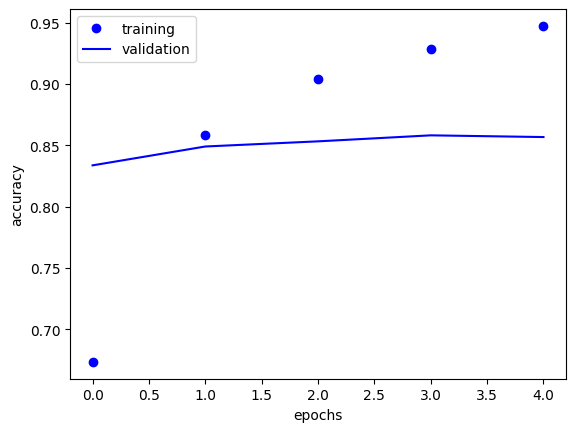

In [57]:
plt.plot(history.history['accuracy'], 'bo')
plt.plot(history.history['val_accuracy'], 'b')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'])
plt.show()